# STAT207 Mini-Project #1 - Factors that affect Fertility in Men 


Idunnuoluwa Akinola

## 1. Introduction

Reproduction is  essential for the continuance of humanity. However research has shown that over the decades sperm count in men seems to have decreased. There is no specific cause and effect that can precisely tell us the reason for this decrease in sperm count, but there are certain factors apart from genentics that could lead to this decrease in sperm count.

The goal of this research is to explore certain factors to see if their relationship with decreasing sperm count in sizeable enough to make some conclusions

why is it important to explore the relationship between these factors and a decrease in male sperm count over the decades?
A good amount of people in society report wanting to have their own offspring in the future. It is very important to know what enviromental or social factors could affect this. Futhermore government official would want to know if there are factors in society that could potentially influence growth rate.

The research question we seek to answer is if sperm count in men is affected by the relationship between a man age and if he has had an accident or any form of trauma in the past.
In recent years there has been an increase in trauma for men between the ages of 20-40 years. Most men in society have been faced with some form of accident or trauma that has been Ignored. This research could bring to new light  to a pontential issue for the continuance of humanity as a whole.Depending on the results from the research, government agencies and individuals could bring more awareness to male trauma and accidents and how to decrease the occurence of these events in society

## 2. Dataset Discussion

We discovered a dataset from the Kaggle website.The dataset is  made from an experiment comprised of 100 male volunteers who provide semen to WHO in 2010, futhermore WHO collected some data about the volunteers socio-demographic status, environmental factors, health status and life habits.The dataset consist of 100 rows and 10 column. The variables Include season when observation occured, age of volunteer, If volunteer has had a childish disease, If volunteer was involved in Accident or serious trauma, If volunteer has had surgery in the past, If volunteer has had high fevers in the past year, alcohol consumption frequency,smoking habits, number of hours spent sitting down per day and If sperm count was altered or normal. The dataset failed to provide observation on the hormonal balance of the volunteer, obesity level , emotional issues and any infections the volunteer may have. In this analysis we ae going to explore the age of the volunteer, if the volunteer has had any accident or serious trauma and whether or not their sperm was altered.Provide below is the link to this data set which was downloaded on Wednesday the 20th of september 2023.https://www.kaggle.com/datasets/muhamedyoussry/fertility-data-set?datasetId=682005

In [1]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  

In [4]:
df = pd.read_csv("fertility.csv")
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [6]:
original_row_num=df.shape[0]
original_row_num

100

I want to check if there are any implicit  NA values in the dataset that could make the results different or biased and there is none in this dataset

In [8]:
df.isna().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

## 3. Dataset Cleaning

Implicit or EXplicit Data Identification and Cleaning

we would like to create a linear regression model to  visualize  how the relationship between the volunteer's age and if he has had an accident or serious trauma could have an impact on his sperm count. To do this first we are going to make a new dataset with just these variables.Futhermore we will check for implicit NA values which we should not have.

In [10]:
df2=df[["Age","Accident or serious trauma","Diagnosis"]]
df2

,Age,Accident or serious trauma,Diagnosis
0,30,yes,Normal
1,35,no,Altered
2,27,no,Normal
3,32,yes,Normal
4,30,yes,Altered
...,...,...,...
95,30,no,Normal
96,29,no,Normal
97,30,yes,Normal
98,30,no,Normal


In [11]:
df2.isna().sum()

Age                           0
Accident or serious trauma    0
Diagnosis                     0
dtype: int64

Single Numerical Variable Outlier Identification and Cleaning

After checking for any NA values we are then going to check if we have any outlier and then we are going to clean them, like previousluy stated we do this to prevent the correlation of our analysis from being skewed or biased, and we want our data to still represent the original data given.Right now we are only going to do this for the  single numerical  variable we have which is the age of the male volunteers. to proceed we are going to create a boxplot to identify any outliers and decide whether or not to drop the outlier depending on their impact on our result 

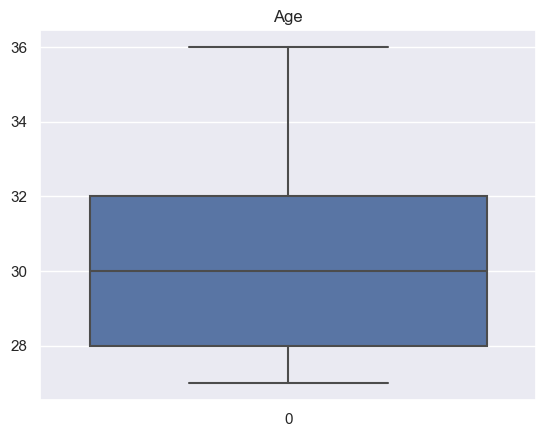

In [14]:
num_cols=["Age"]
for col in num_cols:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

From the visualization above we cannot see any outliers that are distinct from the rest of the rest of the observation so we do not need to drop any outliers.

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

The research question we seek to answer is whether there is an interaction between the age of the volunteer and how whether or not the volunteer has been involved in an accident or serious trauma and we want to know if this interaction has an impact on the sperm count of the volunteer. Because we are comparing one numerical with a categorical variable, and we are trying to see how that relationship impacts a categorical variable we are to make side by side boxplots with Age on the y axis and Accident or serious trauma on the x axis.

<function matplotlib.pyplot.show(close=None, block=None)>

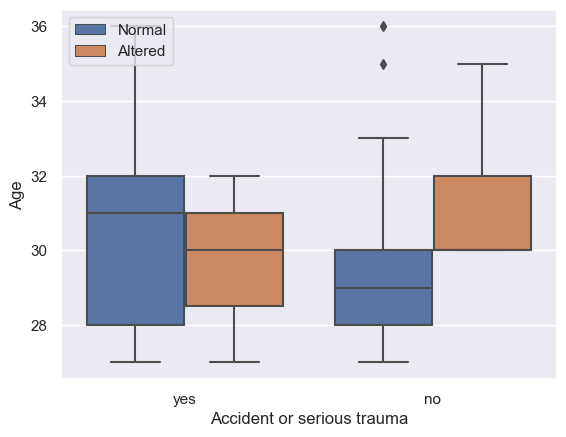

In [28]:
sns.boxplot(x="Accident or serious trauma",y="Age",hue="Diagnosis",data=df2)
plt.legend(loc="upper left")
plt.title("")
plt.show


To analyze the data first we are going to compare the boxplots with summary statistics. we will start with the volunteers who said they have had an accident or serious trauma, we are going to compare volunteers with normal and altered diagnosis. we are going to be compare the measure of center,measure of spread,shape and outliers. For the measure of center, we can see that the median for individual who had accidents or serious trauma with normal sperm count is higher than those with altered sperm count. For the center of spread the range for normal diagnosis is higher than that of altered diagnosis this tells us more people who have had an accident or serious trauma have a normal diagnosis. the shape of the normal diagnosis is negatively  or left skwed and for the altered diagnosis the shape is unimodal. For both normal and altered diagnosis they have no outliers.

Now we are going to compare the volunteers with no accident or trauma and we are going to compare the normal and altered diagnosis. For the center comparision the median for altered is higher than that of normal. The altered diagnosis is more skewed than the normal diagnosis. The normal diagnosis has more outliers than the altered diagnosis. the spread of the normal diagnosis is bigger than that of altered.

Based on the visualization we can see that most most of the men that had trauma or a serious accident still had a normal sperm count and we can also see that men who no trauma still had altered sperm count. we can aslo see that younger men still had a lower sperm count. From the result we can definitely see that there is no true connection between trauma,accident,age and sperm count.

## 5. Conclusion

In Conclusion we can that there is no real realtionship between age, involvement in accident or serious trauma and sperm count. I think one think that could have made the results clearer is if there were more variables to compare, because I definitely think that there are more variables like genetics and nutrition that could affect this. one Idea that I have for future work is to compare sperm count between continents and explore other variables to see if there are more reasons why some continents have a higher growth rate.